<a href="https://colab.research.google.com/github/hanifkamil/demo_test/blob/master/Submission_Time_Series_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [8]:
data_train = pd.read_csv('Tweets_dataset.csv')
data_train.head()

,Unnamed: 0,airline_sentiment,airline_sentiment_confidence,airline,name,text,tweet_created
0,5.700000e+17,neutral,1.0000,Virgin America,cairdin,@VirginAmerica What @dhepburn said.,2/24/2015 11:35
1,5.700000e+17,positive,0.3486,Virgin America,jnardino,@VirginAmerica plus you've added commercials t...,2/24/2015 11:15
2,5.700000e+17,neutral,0.6837,Virgin America,yvonnalynn,@VirginAmerica I didn't today... Must mean I n...,2/24/2015 11:15
3,5.700000e+17,negative,1.0000,Virgin America,jnardino,@VirginAmerica it's really aggressive to blast...,2/24/2015 11:15
4,5.700000e+17,negative,1.0000,Virgin America,jnardino,@VirginAmerica and it's a really big bad thing...,2/24/2015 11:14


In [9]:
data_train.isnull().sum()

Unnamed: 0                      0
airline_sentiment               0
airline_sentiment_confidence    0
airline                         0
name                            0
text                            0
tweet_created                   0
dtype: int64

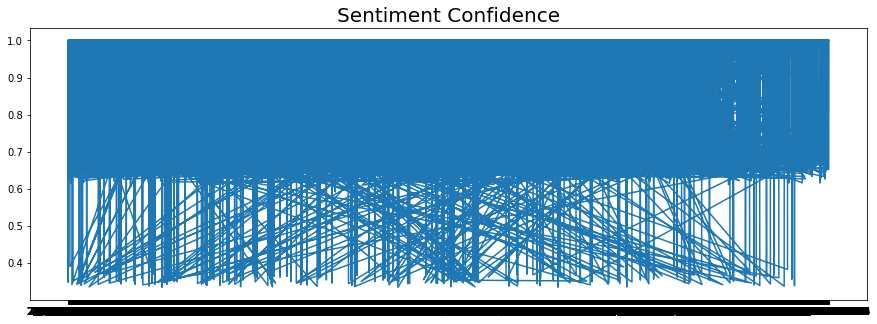

In [15]:
dates = data_train['tweet_created'].values
temp  = data_train['airline_sentiment_confidence'].values
 
 
plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title('Sentiment Confidence',
          fontsize=20);

In [16]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [17]:
train_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [29]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.LogCosh(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=30)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
146/146 [==============================] - 19s 106ms/step - loss: 0.1060 - mae: 0.4157
Epoch 2/30
146/146 [==============================] - 16s 108ms/step - loss: 0.0184 - mae: 0.1275
Epoch 3/30
146/146 [==============================] - 16s 108ms/step - loss: 0.0133 - mae: 0.1340
Epoch 4/30
146/146 [==============================] - 16s 106ms/step - loss: 0.0131 - mae: 0.1400
Epoch 5/30
146/146 [==============================] - 16s 107ms/step - loss: 0.0131 - mae: 0.1413
Epoch 6/30
146/146 [==============================] - 16s 107ms/step - loss: 0.0131 - mae: 0.1415
Epoch 7/30
146/146 [==============================] - 16s 107ms/step - loss: 0.0131 - mae: 0.1415
Epoch 8/30
146/146 [==============================] - 16s 107ms/step - loss: 0.0131 - mae: 0.1416
Epoch 9/30
146/146 [==============================] - 16s 106ms/step - loss: 0.0131 - mae: 0.1415
Epoch 10/30
146/146 [==============================] - 16s 106ms/step - loss: 0.0131 - mae: 0.1417
Epoch 11/30
146/146

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

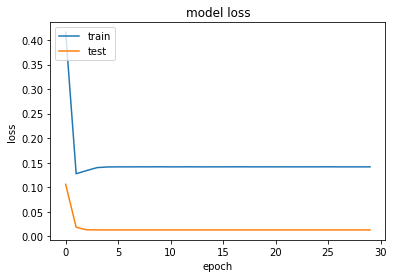

In [36]:
# visualisasi loss plot
plt.plot(history.history['mae'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()